Reading frame 1
fFlare:  0.0
WBGain:  [(1., 1.) (1., 1.) (1., 1.) (1., 1.)]
WBView:  (1., 1.)
fWBTemp:  5600.0
fWBCc:  29.503162384033203
cmCalib:  [[ 1.78539   -0.51633    0.0369889]
 [-0.117981   0.757674   0.610192 ]
 [-0.0492347 -0.552791   2.85105  ]]
whitebalance:  [1.193739671606806, 1.0, 1.7885392465247287]
cmCalib [[ 1.78539   -0.51633    0.0369889]
 [-0.117981   0.757674   0.610192 ]
 [-0.0492347 -0.552791   2.85105  ]]
ccm:  [[ 1.3670162  -0.39533743  0.02832122]
 [-0.09439349  0.606195    0.48819852]
 [-0.02189158 -0.2457915   1.2676831 ]]
ccm2 [[ 1.4793411 -0.51633    0.0369889]
 [-0.117981   0.507789   0.610192 ]
 [-0.0492347 -0.552791   1.6020257]]
fOffset:  0.0
fGain:  1.0
fGainR, fGainG, fGainB:  1.0 1.0 1.0
fGamma, fGammaR, fGammaB:  8.0 0.0 0.0
b'tone' 0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
fPedestalR, fPedesta

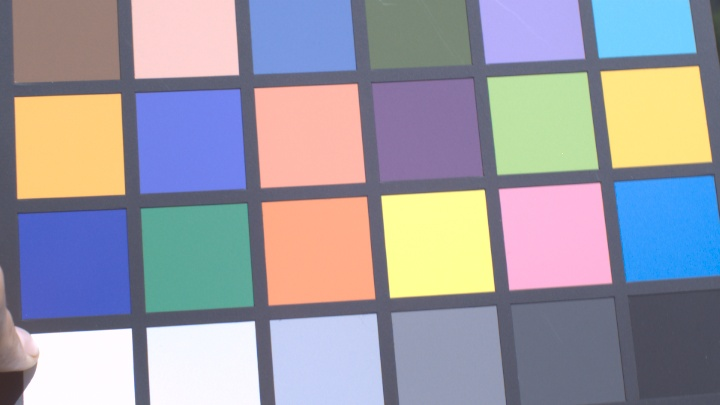

In [4]:
import cv2
import IPython

from pycine.color import color_pipeline, resize
from pycine.raw import read_frames

def imshow(img):
    _,ret = cv2.imencode('.jpg', img * 255) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

def display_frames(cine_file, start_frame=1, count=1):
    raw_images, setup, bpp = read_frames(cine_file, start_frame=start_frame, count=count)
    rgb_images = (color_pipeline(raw_image, setup=setup, bpp=bpp) for raw_image in raw_images)

    for i, rgb_image in enumerate(rgb_images):
        frame = start_frame + i

        if setup.EnableCrop:
            rgb_image = rgb_image[
                setup.CropRect.top : setup.CropRect.bottom + 1, setup.CropRect.left : setup.CropRect.right + 1
            ]

        if setup.EnableResample:
            rgb_image = cv2.resize(rgb_image, (setup.ResampleWidth, setup.ResampleHeight))

        imshow(resize(rgb_image, 720))

display_frames("../testfiles/chart1.cine")
